Kynan Ly (https://github.com/TAPoR-3-Tools/Tapor-Coding-Tools/blob/master/tapor_coding_tools/visualization/Multiple%20correspondence%20analysis%20and%20content%20analysis/Multiple%20Correspondence%20Analysis%20and%20Content%20Analysis.ipynb)

In [48]:
# Import helper libraries
import os
import nltk
import csv
import math

# Import panda / panda related content 
import pandas as pd
from pandas import read_table
import numpy as np

# Import MCA and matplot
from mca import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ensure we can see plots inside Jupyter notebook
%matplotlib inline


In [49]:
# Set path to the file with novels
path = "./ChaptClean"

# Save all the titles of the texts
textName = []

# Save all the content of the texts
textContent = []

# Go to the directory with all the text files
for filename in os.listdir(path):
    
    # Add the file name and remove the file type (in this case ".txt")
    textName.append(filename[:-4])
    
    # Open each file and add all the content 
    with open(path + '/' + filename, "r", encoding="utf8") as file:
         fileContent = file.read()

    # Add the content of the file
    textContent.append(fileContent)

In [50]:
# Define cleaning tokenize function
def cleaning_tokenize_Text(text):
    # Tokenize the text and set it to lower case
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove all non-words
    tokens = [word for word in tokens if word[0].isalpha()]
    return tokens

In [51]:
# List to hold the results
text_clean_tokenized = []

# Token count for z-index 3d model
token_count = []

# Iterate through all the text
for novel in textContent:
    # Clean the text
    text_clean_tokenized.append(cleaning_tokenize_Text(novel))
    token_count.append(len(novel))

print(token_count)

[62333, 72616, 58757, 40145, 90931, 80050, 48224, 35760, 52385, 51701, 51181, 34624, 36160, 35971, 33805, 69699, 40029, 82359, 382782, 406446, 96165, 17510, 20828, 38979, 29647, 28187, 10137, 2671, 27289, 28641, 5321, 33159, 42178, 8541, 24260, 23214, 25299, 32687, 25131, 12601, 14149, 9612, 10757, 13313, 12877, 6710, 11372, 11215, 46119, 11965, 40430, 33340, 19187, 12615, 33213, 124970, 635285, 704859, 10677, 4976, 3996, 248007, 4459, 14824, 11254, 5822, 23889, 1603, 13327, 41415, 14038, 10173, 32316, 10042, 36288, 10101, 4632, 29159]


In [52]:
# General Inquirer Categories: http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm
# The csv name of the inquirer dictionary
csvFile = "inquirerbasic.csv"

# Create a list of rows to hold the values
listOfRows = []

# Reading the csv 
with open(csvFile, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    
    # For every row in the file save it
    for row in data:
        listOfRows.append(row)

# Close the file
file.closed

# Format the category
categories = listOfRows[0]

# We do not need the first 2 category (they have the word, and the source of it)
# The last two columns are description of the words in question. We also do not need that
# Note the csv also as additional 4 empty columns at the end (that is why we have -6)
categories = categories[2:len(categories)-6]

# Check on how many categories
print("Length of category " + str(len(categories)))

# Print out the first 5 categories
print(categories[:5])

Length of category 182
['Positiv', 'Negativ', 'Pstv', 'Affil', 'Ngtv']


General Inquirer Category Helper Functions
Below are helper functions that help categorize the tokenized text in the corresponding categories.

In [53]:
# Set all the categories of a word into a set if that word did not exist already
def new_attribute_set(row):
    # The reason for a set because it is faster to load
    attributeSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            attributeSet.add(element)
    return attributeSet;

# Combine with pre-existing set with any new additions
def combine_attribute_set(row, oldset):
    # The reason for a set because it is faster to load
    newSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            newSet.add(element)
    
    # Return a new updated set
    return (oldset | newSet)

# Assign every word with the categories (in a set)
def get_dictionary_list(listOfRows,categories):
    returnDict = {}

    # For every row create the set of categories that belong to it
    for row in listOfRows:
        
        # Reduce the word to the base. This is because the csv has LOVE#1, LOVE#2 to symbolize different meanings
        # In this anaylsis we are going to collapse them together
        word = row[0].split("#", 1)[0]
    
        # Check to see if the word is in the dictionary already
        if word in returnDict:
            returnDict[word] = combine_attribute_set(row[2:len(categories)-2], returnDict[word])
        else:
            returnDict[word] = new_attribute_set(row[2:len(categories)-2])
        
    return returnDict

# Creates the columns we need and fills them with how many of each category the text belongs to
def update_values_category(dataframe):
    # Finds and counts all the categories it belongs to
    resultDictionary = find_category(dataframe["tokens"])
    # Iterate through the results
    for k, v in resultDictionary.items():
        # Create columns for every category
        dataframe[k] = v
    return dataframe

# Looks through the tokens and increments the appropriate categories that it belongs to
def find_category(tokens):
    # Set all categories to 0 as default
    GICategories = {el:0 for el in categories}
    # Iterate through all tokens
    for element in tokens:
        # If it exists increment the value
        if element.upper() in dictWords:
            inside = dictWords[element.upper()]
    
            # Increment the category
            for element in inside:
                GICategories[element] += 1
    
    return GICategories

In [54]:
# Create dictionary of words and their respective categories
dictWords = get_dictionary_list(listOfRows[1:], categories)

# Have a look at the dictionary
dictWords

{'ABIDE': {'Active', 'Affil', 'Doctrin', 'IAV', 'Positiv'},
 'ABILITY': {'ABS', 'Abs@', 'EVAL', 'MeansLw', 'Positiv', 'Strong', 'Virtue'},
 'ABLE': {'EVAL', 'MeansLw', 'Positiv', 'Pstv', 'Strong', 'Virtue'},
 'ABOUND': {'IAV', 'Increas', 'Passive', 'Positiv'},
 'ABSOLVE': {'Active', 'ComForm', 'IAV', 'Positiv', 'SocRel'},
 'ABSORBENT': {'Increas', 'IndAdj', 'Positiv'},
 'ABSORPTION': {'Affil', 'Increas', 'Positiv'},
 'ABUNDANCE': {'ECON',
  'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ABUNDANT': {'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ACCEDE': {'Active',
  'Affil',
  'ComForm',
  'IAV',
  'Positiv',
  'PowGain',
  'PowTot'},
 'ACCENTUATE': {'Active', 'IAV', 'Ovrst', 'Positiv'},
 'ACCEPT': {'IAV', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel', 'Submit'},
 'ACCEPTABLE': {'EVAL', 'PosAff', 'Positiv', 'Pstv', 'Virtue'},
 'ACCEPTANCE': {'Affil', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel'},
 'ACCESSIBLE': 

In [55]:
# Create a dataframe to store all the values
MCA_Dataframe = pd.DataFrame(index=textName)

# Insert the tokenized data
MCA_Dataframe.insert(loc=0, column='tokens', value=text_clean_tokenized)

# Count the number of times each category appears in the text based on the their tokens
MCA_Dataframe = MCA_Dataframe.apply(update_values_category, axis=1)

# Remove the tokens frame as we are done with it now
MCA_Dataframe = MCA_Dataframe.drop("tokens", axis=1)

# Replace any empty cell with 0
MCA_Dataframe = MCA_Dataframe.fillna(0)

# Have a look at what the dataframe looks like
MCA_Dataframe

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
BerkeleyAlciphron_FifthDialogue,1056,757,986,505,620,446,1282,767,475,212,...,187,44,2,139,179,438,0,0,0,0
BerkeleyAlciphron_FirstDialogue,1107,511,1039,447,448,318,1169,618,442,230,...,257,38,2,66,194,494,0,0,0,0
BerkeleyAlciphron_FourthDialogue,1031,535,933,500,489,363,1306,774,401,260,...,152,16,4,64,119,440,0,0,0,0
BerkeleyAlciphron_SecondDialogue,753,495,703,399,426,283,983,611,351,150,...,115,15,7,64,150,292,0,0,0,0
BerkeleyAlciphron_SeventhDialogue,1641,946,1515,835,872,661,2132,1186,618,506,...,215,23,5,112,196,712,0,0,0,0
BerkeleyAlciphron_SixthDialogue,1368,822,1254,600,719,508,1729,947,631,343,...,201,47,1,108,155,693,0,0,0,0
BerkeleyAlciphron_ThirdDialogue,1143,457,1088,482,413,274,1049,578,337,207,...,155,31,1,56,175,362,0,0,0,0
BerkeleyHumanKnowledge_Intro,478,341,450,284,316,181,718,414,290,165,...,102,12,1,20,36,330,0,0,0,0
BerkeleyHumanKnowledge_Part1,703,473,654,458,436,338,975,515,400,241,...,83,7,0,47,64,409,0,0,0,0
BerkeleyHumanKnowledge_Part2,744,468,689,433,427,303,1053,581,393,217,...,92,20,0,60,83,456,0,0,0,0


In [56]:
# Divide each cell by the sum of the row
MCA_Dataframe.loc[:] = MCA_Dataframe.loc[:].div(MCA_Dataframe.sum(axis=1), axis=0)

# See the results
MCA_Dataframe

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
BerkeleyAlciphron_FifthDialogue,0.026384,0.018914,0.024635,0.012617,0.015491,0.011143,0.032031,0.019164,0.011868,0.005297,...,0.004672,0.001099,0.000050,0.003473,0.004472,0.010943,0.0,0.0,0.0,0.0
BerkeleyAlciphron_FirstDialogue,0.029870,0.013788,0.028035,0.012061,0.012088,0.008580,0.031543,0.016675,0.011926,0.006206,...,0.006935,0.001025,0.000054,0.001781,0.005235,0.013329,0.0,0.0,0.0,0.0
BerkeleyAlciphron_FourthDialogue,0.025472,0.013218,0.023051,0.012353,0.012081,0.008968,0.032266,0.019122,0.009907,0.006424,...,0.003755,0.000395,0.000099,0.001581,0.002940,0.010871,0.0,0.0,0.0,0.0
BerkeleyAlciphron_SecondDialogue,0.026542,0.017448,0.024780,0.014064,0.015016,0.009975,0.034649,0.021537,0.012372,0.005287,...,0.004054,0.000529,0.000247,0.002256,0.005287,0.010293,0.0,0.0,0.0,0.0
BerkeleyAlciphron_SeventhDialogue,0.026155,0.015078,0.024147,0.013308,0.013898,0.010535,0.033980,0.018903,0.009850,0.008065,...,0.003427,0.000367,0.000080,0.001785,0.003124,0.011348,0.0,0.0,0.0,0.0
BerkeleyAlciphron_SixthDialogue,0.025795,0.015499,0.023645,0.011313,0.013557,0.009579,0.032602,0.017856,0.011898,0.006468,...,0.003790,0.000886,0.000019,0.002036,0.002923,0.013067,0.0,0.0,0.0,0.0
BerkeleyAlciphron_ThirdDialogue,0.034586,0.013828,0.032922,0.014585,0.012497,0.008291,0.031742,0.017490,0.010197,0.006264,...,0.004690,0.000938,0.000030,0.001695,0.005295,0.010954,0.0,0.0,0.0,0.0
BerkeleyHumanKnowledge_Intro,0.021629,0.015430,0.020362,0.012851,0.014299,0.008190,0.032489,0.018733,0.013122,0.007466,...,0.004615,0.000543,0.000045,0.000905,0.001629,0.014932,0.0,0.0,0.0,0.0
BerkeleyHumanKnowledge_Part1,0.022020,0.014816,0.020485,0.014346,0.013657,0.010587,0.030539,0.016131,0.012529,0.007549,...,0.002600,0.000219,0.000000,0.001472,0.002005,0.012811,0.0,0.0,0.0,0.0
BerkeleyHumanKnowledge_Part2,0.023548,0.014812,0.021807,0.013705,0.013515,0.009590,0.033328,0.018389,0.012439,0.006868,...,0.002912,0.000633,0.000000,0.001899,0.002627,0.014433,0.0,0.0,0.0,0.0


In [57]:
# Run MCA on the dataframe (first 10 columns)
mca_test = MCA(MCA_Dataframe.loc[:'Submit'], benzecri=False)

# Acquire the factor score for the Authors
Authors_Score = mca_test.fs_r().T

# Acquire the factor score for the Categories
Category_Score = mca_test.fs_c().T

# Returns the variance of each Axis 
Variance = mca_test.L

# Calculate the % variance of total
Variance_total = [Variance[0] / (Variance[0] + Variance[1]), Variance[1] / (Variance[0] + Variance[1])]

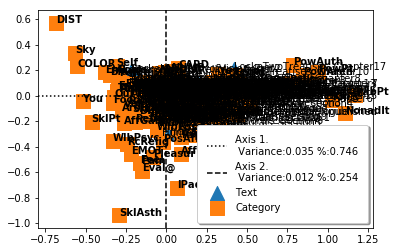

In [58]:
# Set the Author points to be represented by Triangles
plt.scatter(Authors_Score[0], Authors_Score[1], cmap='magma', s=200, marker = '^', label='Text')

# Set the Category points to be represented by Squares
plt.scatter(Category_Score[0], Category_Score[1], cmap='magma', s=200, marker = 's', label='Category')

# Set the size of the figure
plt.rcParams["figure.figsize"] = (15,10)

# Label each point for Author
for i, txt in enumerate(textName):
    plt.annotate(txt, (Authors_Score[0][i],Authors_Score[1][i]), fontsize = 10)

# Label each point for Category
for i, txt in enumerate(categories[:181]):
    plt.annotate(txt, (Category_Score[0][i],Category_Score[1][i]), fontsize = 10, fontweight='bold')
    
# Draw axis
Axis1_Label= "Axis 1. \n Variance:" + str(format(Variance[0], '.3f')) + " %:" + str(format(Variance_total[0], '.3f'))
Axis2_Label= "Axis 2. \n Variance:" + str(format(Variance[1], '.3f')) + " %:" + str(format(Variance_total[1], '.3f'))
plt.axhline(0, color='black',linestyle=':', label=Axis1_Label)
plt.axvline(0, color='black',linestyle='--', label=Axis2_Label)

# Set Legend
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)    

# Display Graph
plt.show()

In [59]:
# Store the Author and Titles in a variable with the correct coordinate for 3D Plot
author = []
for i, txt in enumerate(textName):
    x = []
    x = (Authors_Score[0][i], Authors_Score[1][i], txt)
    #print(xt)
    author.append(x)
    
print(author)

[(-0.04287254023945216, -0.11607853807462068, 'BerkeleyAlciphron_FifthDialogue'), (-0.010308925991211314, -0.11563436764648234, 'BerkeleyAlciphron_FirstDialogue'), (-0.14637928411006731, 0.022448990189175035, 'BerkeleyAlciphron_FourthDialogue'), (0.027341037616622023, -0.14648996588926536, 'BerkeleyAlciphron_SecondDialogue'), (-0.09247325327052895, -0.014706990777141108, 'BerkeleyAlciphron_SeventhDialogue'), (-0.09190666928214455, -0.03820308842578161, 'BerkeleyAlciphron_SixthDialogue'), (-0.0904496388382886, -0.14270456238190501, 'BerkeleyAlciphron_ThirdDialogue'), (-0.13710722101594267, 0.08459318853938526, 'BerkeleyHumanKnowledge_Intro'), (-0.2065613972490872, 0.08783218724191513, 'BerkeleyHumanKnowledge_Part1'), (-0.17025905734828053, 0.05835667181742843, 'BerkeleyHumanKnowledge_Part2'), (-0.13297317004851877, 0.04874867451340771, 'BerkeleyHumanKnowledge_Part3'), (-0.226108810688586, 0.15729280013938798, 'BerkeleyTheoryofVision_Part1'), (-0.222338320034854, 0.19230215929095232, 'Be

In [60]:
# Store the Category Name in a variable with the correct coordinate for 3D Plot
category =[]
for i, txt in enumerate(categories[:181]):
    x = []
    x = (Category_Score[0][i], Category_Score[1][i], txt)
    category.append(x)
    
print(category[:10])

[(-0.025413462663362908, -0.15941106226603663, 'Positiv'), (-0.09529372270900159, -0.10626918556931796, 'Negativ'), (-0.05538634593338131, -0.16512658239612624, 'Pstv'), (0.021111210063291128, -0.09915411931105586, 'Affil'), (-0.12665392082185628, -0.06849463324370567, 'Ngtv'), (-0.05234500859593218, -0.014569741426014369, 'Hostile'), (0.0785702718365269, 0.016994756368373776, 'Strong'), (0.26394117714187654, 0.08143970442201247, 'Power'), (0.014226039116405947, -0.025915010202281655, 'Weak'), (-0.0009726070536107805, 0.04549342061147915, 'Submit')]


<IPython.core.display.Javascript object>


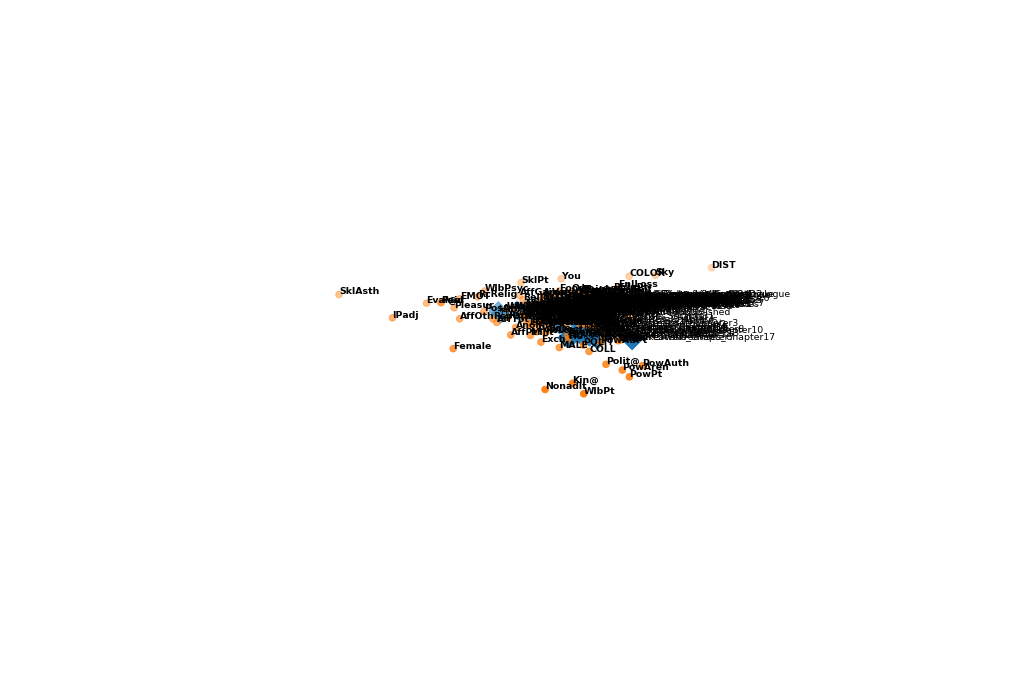

In [62]:
# Need to switch to notebook view, implement twice due to Jupyter bug
%matplotlib notebook
%matplotlib notebook

#3D Representation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Turn axis on and off
ax.set_axis_off()

plt.rcParams["figure.figsize"] = (15,10)

x = np.asarray(Authors_Score[0])
y = np.asarray(Authors_Score[1])
ax.scatter(x, y, cmap='magma', s=200, marker = 'D', label='Text')

xC = np.asarray(Category_Score[0])
yC = np.asarray(Category_Score[1])
ax.scatter(xC, yC, cmap='magma', s=200, marker = '.', label='Category')

# Label each point for Author
for x, y, s in author:
    ax.text(x, y, 0, s, fontsize = 10)
    
# Label each point for Category
for x, y, s in category:
    ax.text(x, y, 0, s, fontsize = 10, fontweight='bold')

# rotate the axes (with mouse) and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
    

In [63]:
# Write interactive figure to HTML
import mpld3
mpld3.enable_notebook()
mpld3.save_html(fig,"mcaAdd.html")
mpld3.fig_to_html(fig,template_type="simple")
mpld3.disable_notebook()
mpld3.display()